# Importing data

In [2]:
import pandas as pd
df= pd.read_csv("data/innerArm.csv")
df.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Preprocess data
df.columns = df.iloc[0]
df.drop(0, axis=0, inplace = True)
df.columns = ["patient", "diabetic"] + list(df.columns[2:])

In [4]:
# Check for missing data
df.isnull().sum()

patient     0
diabetic    0
0.0         0
1.0         0
2.0         0
           ..
3155        0
3156        0
3157        0
3158        0
3159        0
Length: 3162, dtype: int64

In [5]:
df.diabetic.value_counts()

diabetic
1.0    11
0.0     9
Name: count, dtype: int64

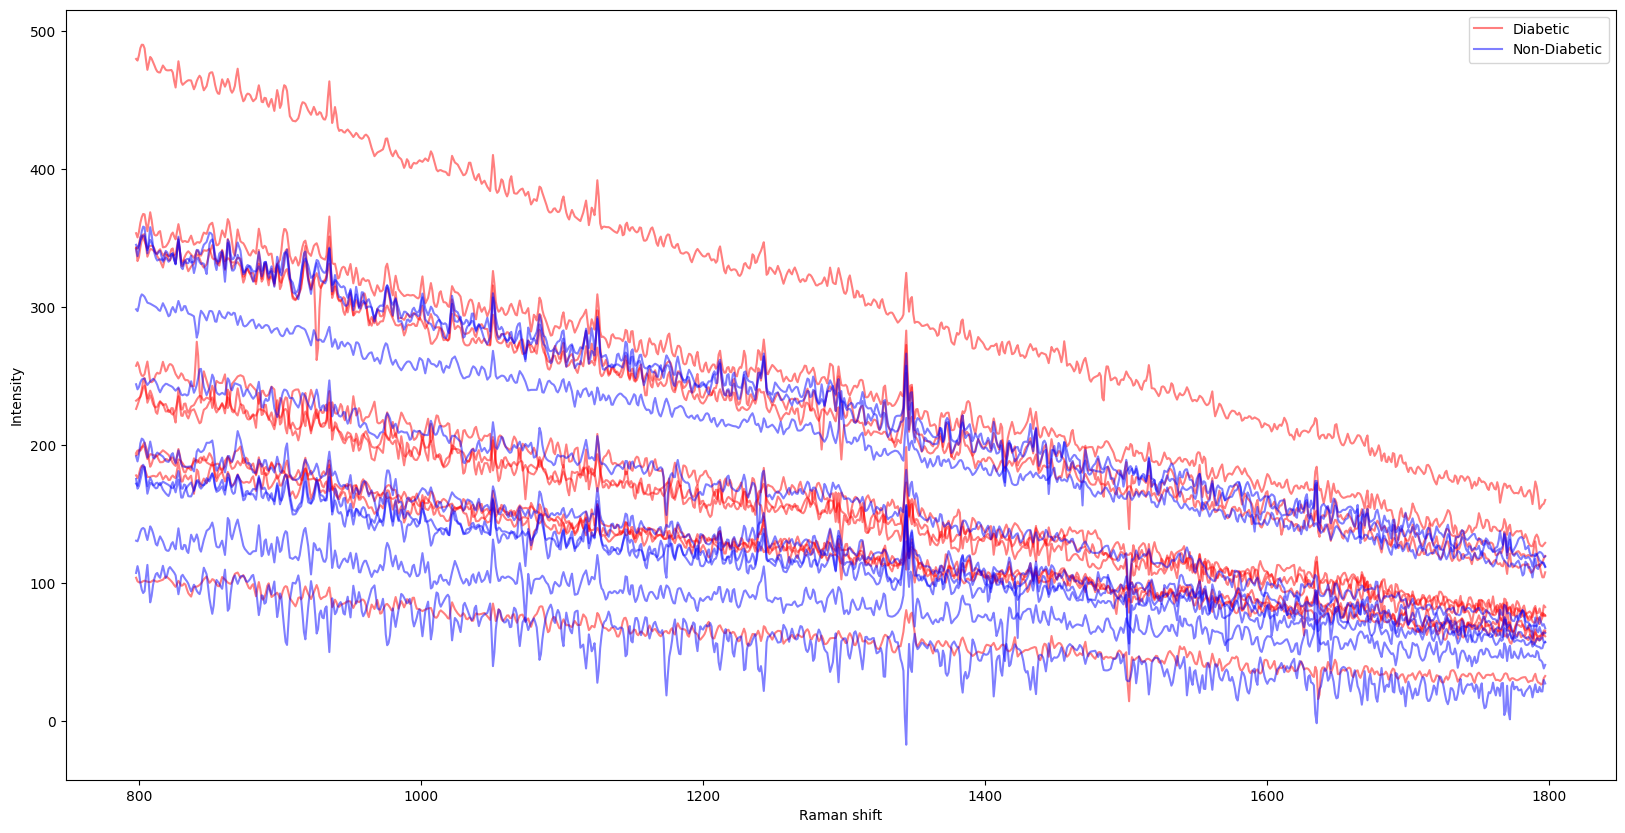

In [17]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the figure size
plt.figure(figsize=(20, 10))

# Initialize variables to track if legend has been added
diabetic_legend = False
non_diabetic_legend = False

# Loop through the rows of the DataFrame
for i in range(0, len(df)):
    # Check the value of "diabetic" column for each row
    if df.loc[i + 1, "diabetic"] == 1:
        # Plot a red line for diabetic patients
        sns.lineplot(df.iloc[i, 800:1800], color='r', alpha=0.5)
        # Add the legend for diabetic patients only if it hasn't been added yet
        if not diabetic_legend:
            plt.plot([], [], color='r', alpha=0.5, label='Diabetic')
            diabetic_legend = True
    else:
        # Plot a blue line for non-diabetic patients
        sns.lineplot(df.iloc[i, 800:1800], color='b', alpha=0.5)
        # Add the legend for non-diabetic patients only if it hasn't been added yet
        if not non_diabetic_legend:
            plt.plot([], [], color='b', alpha=0.5, label='Non-Diabetic')
            non_diabetic_legend = True

# Set the y-axis label
plt.ylabel("Intensity")

# Set the x-axis label
plt.xlabel("Raman shift")

# Display the legend
plt.legend()

# Display the plot
plt.show()


In [7]:
df.head()

,patient,diabetic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0
5,DM205,1.0,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,...,0,0,0,0,0,0,0,0,0,0


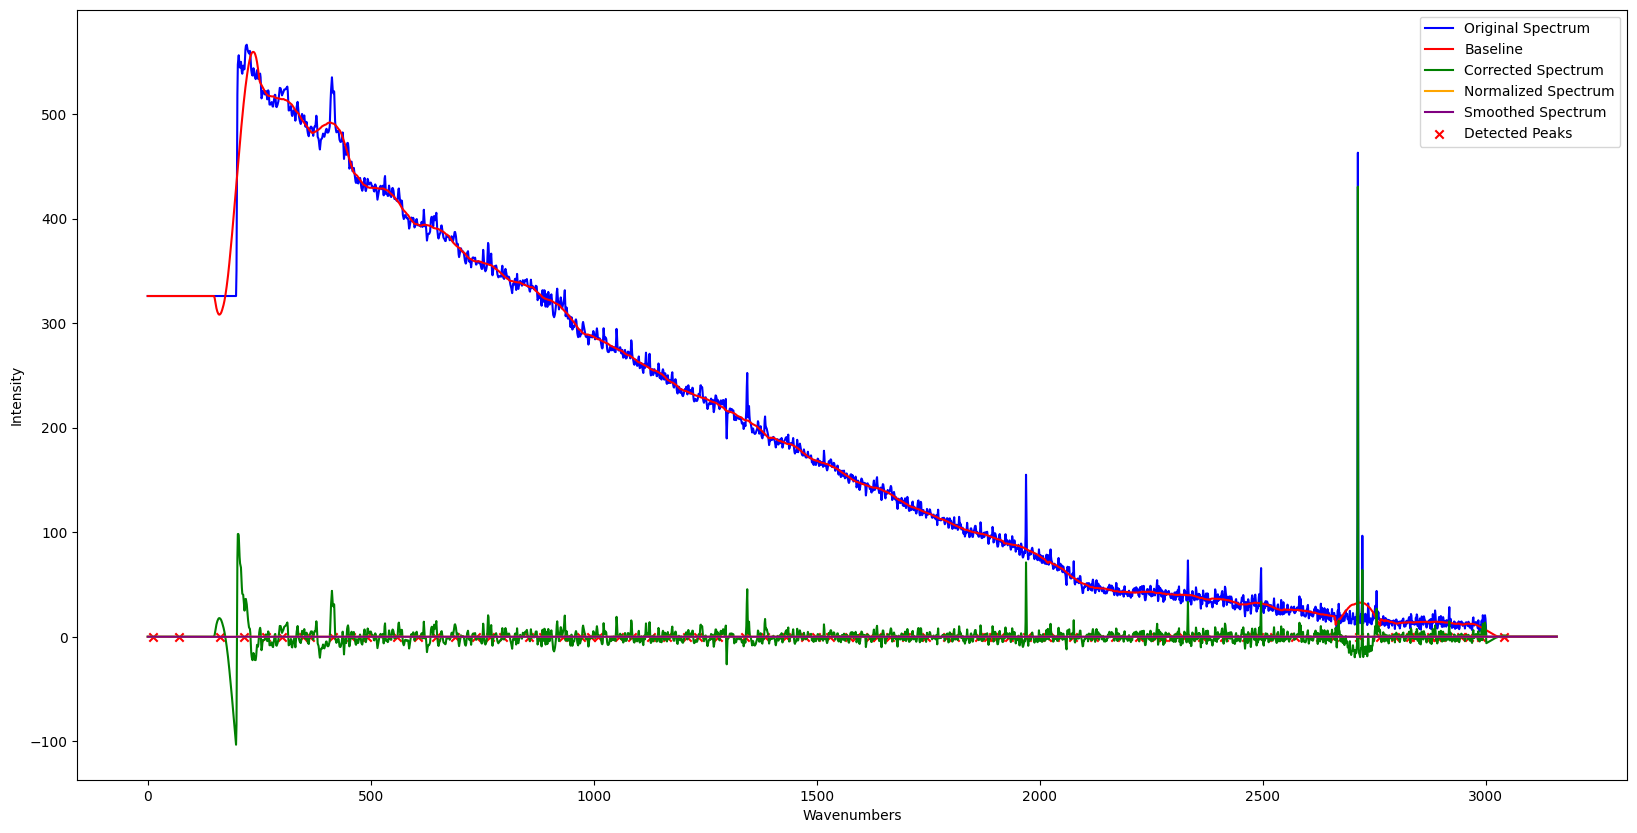

In [15]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Example Raman spectrum (x: wavenumbers, y: intensity)
x = np.array([int(i) for i in list(df.columns[2:])])
y = df.iloc[0,2:].values  # Replace this with your actual Raman spectrum

# Baseline Correction (using asymmetric least squares algorithm)
baseline = signal.savgol_filter(y, 101, polyorder=3)  # You can also use other baseline correction methods

# Remove baseline from the original spectrum
corrected_spectrum = y - baseline

# Normalize the spectrum
normalized_spectrum = corrected_spectrum / np.max(corrected_spectrum)

# Apply smoothing
smoothed_spectrum = signal.savgol_filter(normalized_spectrum, 51, polyorder=3)

# Peak Detection (using argrelmax from scipy.signal)
peaks_indices = signal.argrelmax(smoothed_spectrum, order=10)[0]
peaks_values = smoothed_spectrum[peaks_indices]
peaks_wavenumbers = x[peaks_indices]

# Plot the results
plt.figure(figsize=(20,10))
plt.plot(x, y, label="Original Spectrum", color='blue')
plt.plot(x, baseline, label="Baseline", color='red')
plt.plot(x, corrected_spectrum, label="Corrected Spectrum", color='green')
plt.plot(x, normalized_spectrum, label="Normalized Spectrum", color='orange')
plt.plot(x, smoothed_spectrum, label="Smoothed Spectrum", color='purple')
plt.scatter(peaks_wavenumbers, peaks_values, color='red', marker='x', label="Detected Peaks")
plt.xlabel("Wavenumbers")
plt.ylabel("Intensity")
plt.legend()
plt.show()


In [23]:
df.head()

,patient,diabetic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0
5,DM205,1.0,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import numpy as np
import scipy.signal as signal
import pandas as pd
from sklearn.model_selection import train_test_split
# Split the DataFrame into training and testing setse
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42)

def preprocess_raman_spectrum(df):
    """
    Preprocess Raman spectra in the DataFrame using Savitzky-Golay filter and other steps.

    Parameters:
        df (pd.DataFrame): Input DataFrame with each row representing a sample and each column representing a Raman shift.

    Returns:
        pd.DataFrame: Preprocessed DataFrame with each row representing a sample and each column representing a preprocessed Raman shift.
    """
    preprocessed_df = pd.DataFrame()
    
    for i in range(len(df)):
        # Get Raman spectrum for the current sample
        spectrum = df.iloc[i, :].values

        # Baseline Correction (using asymmetric least squares algorithm)
        baseline = signal.savgol_filter(spectrum, 101, polyorder=3)

        # Remove baseline from the original spectrum
        corrected_spectrum = spectrum - baseline

        # Normalize the spectrum
        normalized_spectrum = corrected_spectrum / np.max(corrected_spectrum)

        # Apply smoothing
        smoothed_spectrum = signal.savgol_filter(normalized_spectrum, 51, polyorder=3)

        # Add the preprocessed spectrum to the new DataFrame
        preprocessed_df = pd.concat([preprocessed_df, pd.Series(smoothed_spectrum)], axis=1)

    # Transpose the DataFrame to have the original format (rows as samples, columns as Raman shifts)
    preprocessed_df = preprocessed_df.T

    # Reset the column names to match the original Raman shifts
    preprocessed_df.columns = df.columns

    return preprocessed_df

# Example usage:
# Assuming your original DataFrame is named 'df'
preprocessed_train_df = preprocess_raman_spectrum(train_df.iloc[:,2:])
preprocessed_val_df = preprocess_raman_spectrum(val_df.iloc[:,2:])

In [25]:
preprocessed_train_df.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,3150.0,3151.0,3152.0,3153.0,3154.0,3155.0,3156.0,3157.0,3158.0,3159.0
0,-1.858134e-15,-1.273302e-15,-7.623489e-16,-3.215870e-16,5.266987e-17,3.641085e-16,6.164156e-16,8.132776e-16,9.583813e-16,1.055413e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-1.168871e-14,-8.034866e-15,-4.842190e-15,-2.087665e-15,2.517227e-16,2.198987e-15,3.777141e-15,5.009200e-15,5.918176e-15,6.527085e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-3.382070e-14,-2.374452e-14,-1.492431e-14,-7.297570e-15,-8.018271e-16,4.625402e-15,9.046601e-15,1.252425e-14,1.512083e-14,1.689883e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-1.591395e-15,-1.109128e-15,-6.873804e-16,-3.231376e-16,-1.338695e-17,2.448849e-16,4.546912e-16,6.190450e-16,7.409597e-16,8.234485e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-2.377957e-14,-1.646639e-14,-1.006067e-14,-4.517379e-15,2.085078e-16,4.162018e-15,7.388180e-15,9.932021e-15,1.183857e-14,1.315285e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import torch

# Load the model from the .pt file
model = torch.load('checkpoint\Exp1.pt')

model

{'epoch': 11,
 'model_state_dict': OrderedDict([('conv1.weight',
               tensor([[[ 1.0571e-02, -1.2885e-02, -1.9303e-02,  2.1382e-01,  1.4123e-01,
                         -1.6542e-01,  1.1705e-01, -9.0213e-02,  6.2287e-02, -1.7944e-01,
                          4.5000e-02,  1.4404e-01, -3.0221e-02,  2.0156e-01,  2.0962e-01,
                         -1.3234e-01, -8.7833e-02, -2.0939e-01, -1.6629e-02,  1.7832e-01]],
               
                       [[-1.9928e-01, -1.4930e-01,  8.3367e-02, -1.8092e-03, -7.6291e-02,
                          1.4829e-01,  1.5125e-01, -6.2401e-02,  1.5668e-01,  1.5133e-01,
                          1.8235e-01,  2.6034e-02, -1.8298e-01,  3.1702e-02,  4.3903e-02,
                         -1.1469e-01,  1.1992e-01,  2.1619e-01,  3.7953e-02,  1.3776e-01]],
               
                       [[ 2.1800e-01, -1.3679e-01,  5.5243e-02, -4.9086e-02,  1.9059e-01,
                          1.8740e-01, -4.1253e-02, -6.8276e-02, -1.3263e-01,  1.0148e-01,

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
from models.CNNEN import RamanModel

params = {

    # Model hyperparameters
    'lr': 0.0001,
    'batch_size': 4,
    'epochs': 2000,
    'elasticnet': True,
    'regularization': 0.007,

    # convolution layer
    'out_channels':32,
    'kernel_size': 20
    

}
# Create an instance of the model
input_size = 800  # Replace this with the appropriate input size
  # Replace this with your params dictionary
model = RamanModel(input_size, params)

# Print the summary of the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move the model to the GPU if available

# Use a dummy input with the appropriate shape (batch_size, channels, sequence_length)
dummy_input = torch.randn(1, 1, input_size).to(device)

# Print the summary
summary(model, input_size=(1, input_size))  # Assuming 1 channel for Raman spectra


NameError: name 'df' is not defined